In [88]:
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

## Lets create fake data y = 3a +2b + 9 + error

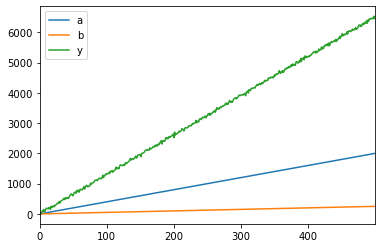

In [61]:
size = 500
a = [4*y for y in range(size)]
b = [0.5*y for y in range(size)]
noise = np.random.normal(0,30,size)
y = [ 3*a[i] + 2*b[i] + 9 + noise[i] for i in range(size)]
data = np.transpose(np.array([a,b,y]))
data = pd.DataFrame(data, columns=['a','b','y'])
data.plot()

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(data[['a','b']], data['y'], test_size=0.2, random_state=123)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")

X_train: (400, 2), X_test: (100, 2)


## First We Use Statsmodels

In [70]:
X_train_statsmodels = sm.add_constant(X_train)
X_test_statsmodels = sm.add_constant(X_test)
model = sm.OLS(Y_train, X_train_statsmodels)
fitted = model.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.658e+06
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:30:27   Log-Likelihood:                -1918.6
No. Observations:                 400   AIC:                             3841.
Df Residuals:                     398   BIC:                             3849.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6974      2.954      1.929      0.0

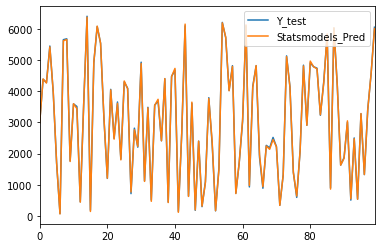

In [86]:
Y_pred_statsmodels = fitted.predict(X_test_statsmodels)
out_statsmodels = np.transpose(np.array([Y_test, Y_pred_statsmodels]))
out_statsmodels = pd.DataFrame(out_statsmodels, columns=['Y_test', 'Statsmodels_Pred'])
out_statsmodels['error'] = out_statsmodels.Y_test - out_statsmodels.Statsmodels_Pred
out_statsmodels.plot(y=['Y_test', 'Statsmodels_Pred'])

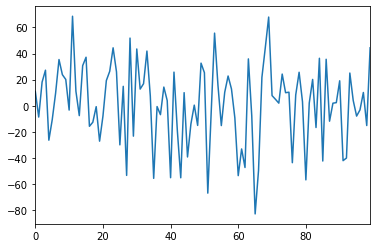

In [87]:
out_statsmodels.error.plot()

In [85]:
pred = fitted.get_prediction(X_test_statsmodels)
pred.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
229,2985.640305,1.489438,2982.712156,2988.568454,2927.827325,3043.453285
337,4391.028212,1.692950,4387.699971,4394.356453,4333.193588,4448.862837
327,4260.899702,1.645001,4257.665725,4264.133679,4203.070426,4318.728979
416,5419.043440,2.201936,5414.714562,5423.372319,5361.142613,5476.944268
306,3987.629831,1.560899,3984.561195,3990.698468,3929.809566,4045.450097
...,...,...,...,...,...,...
252,3284.935878,1.468569,3282.048755,3287.823001,3227.124961,3342.746794
102,1333.008229,2.122442,1328.835631,1337.180827,1275.118876,1390.897582
261,3402.051537,1.470358,3399.160897,3404.942176,3344.240445,3459.862629
351,4573.208126,1.767615,4569.733097,4576.683155,4515.364869,4631.051383


## Now We Use Sklearn

In [98]:
model_sk = LinearRegression()
model_sk.fit(np.asarray(X_train), np.asarray(Y_train))

LinearRegression()

In [99]:
model_sk.coef_

array([3.20316332, 0.40039542])

In [100]:
model_sk.intercept_

5.697428131734796

In [108]:
Y_pred = model_sk.predict(X_test)
print(f"MSE: {mean_squared_error(Y_test, Y_pred)}, R-squared: {r2_score(Y_test, Y_pred)}")

MSE: 938.1094876586026, R-squared: 0.9997138109479112
